# Order Analysis - Complete Data Analysis with Visualizations

This notebook provides a comprehensive analysis of order data including customers, orders, products, and order items.

## 1. Import Required Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configure matplotlib for better looking plots
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Data from CSV Files

In [5]:
# Load all CSV files
orders_df = pd.read_csv('orders.csv')
order_items_df = pd.read_csv('order_items.csv')
products_df = pd.read_csv('products.csv')

# Convert date columns to datetime
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])

print("Data loaded successfully!")
print(f"Orders: {len(orders_df)} records")
print(f"Order Items: {len(order_items_df)} records")
print(f"Products: {len(products_df)} records")

Data loaded successfully!
Orders: 15000 records
Order Items: 44814 records
Products: 4920 records


## 3. Data Overview and Basic Statistics

In [6]:
# Display first few rows of each dataset
print("=" * 80)
print("ORDERS DATA - Sample")
print("=" * 80)
print(orders_df.head())
print("\n" + "=" * 80)
print("ORDER ITEMS DATA - Sample")
print("=" * 80)
print(order_items_df.head())
print("\n" + "=" * 80)
print("PRODUCTS DATA - Sample")
print("=" * 80)
print(products_df.head())

ORDERS DATA - Sample
   order_id  customer_id order_date order_status  total_amount
0         1         1804 2025-03-03    Confirmed      13631.66
1         2         3970 2024-07-16    Confirmed      36811.25
2         3         1080 2024-11-27    Confirmed      31921.25
3         4         4230 2024-05-12    Confirmed        658.29
4         5         4020 2024-04-20    Cancelled      30755.25

ORDER ITEMS DATA - Sample
   order_item_id  order_id  product_id  quantity  unit_price  total_price
0              1         1         725         3      646.07      1938.21
1              2         1         136         6     5112.84     30677.04
2              3         1        3993         5       25.83       129.15
3              4         1        1055         2      219.02       438.04
4              5         2        4382         7      651.25      4558.75

PRODUCTS DATA - Sample
   product_id            product_name     category    price  stock_quantity
0           1  Smartphone cons

In [7]:
# Data info and statistics
print("=" * 80)
print("ORDERS DATASET INFO")
print("=" * 80)
print(orders_df.info())
print("\n" + "=" * 80)
print("ORDERS STATISTICAL SUMMARY")
print("=" * 80)
print(orders_df.describe())

ORDERS DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      15000 non-null  int64         
 1   customer_id   15000 non-null  int64         
 2   order_date    15000 non-null  datetime64[ns]
 3   order_status  15000 non-null  object        
 4   total_amount  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 586.1+ KB
None

ORDERS STATISTICAL SUMMARY
           order_id   customer_id                  order_date  total_amount
count  15000.000000  15000.000000                       15000  15000.000000
mean    7500.500000   2506.066733  2025-02-11 02:30:14.400000  25094.328787
min        1.000000      1.000000         2024-02-12 00:00:00    506.100000
25%     3750.750000   1250.750000         2024-08-12 00:00:00  12811.327500
50%     7500.500000   2519

## 4. Order Status Distribution Analysis

Order Status Distribution:
order_status
Delivered    3112
Shipped      3024
Confirmed    2979
Pending      2962
Cancelled    2923
Name: count, dtype: int64

Total Orders: 15000


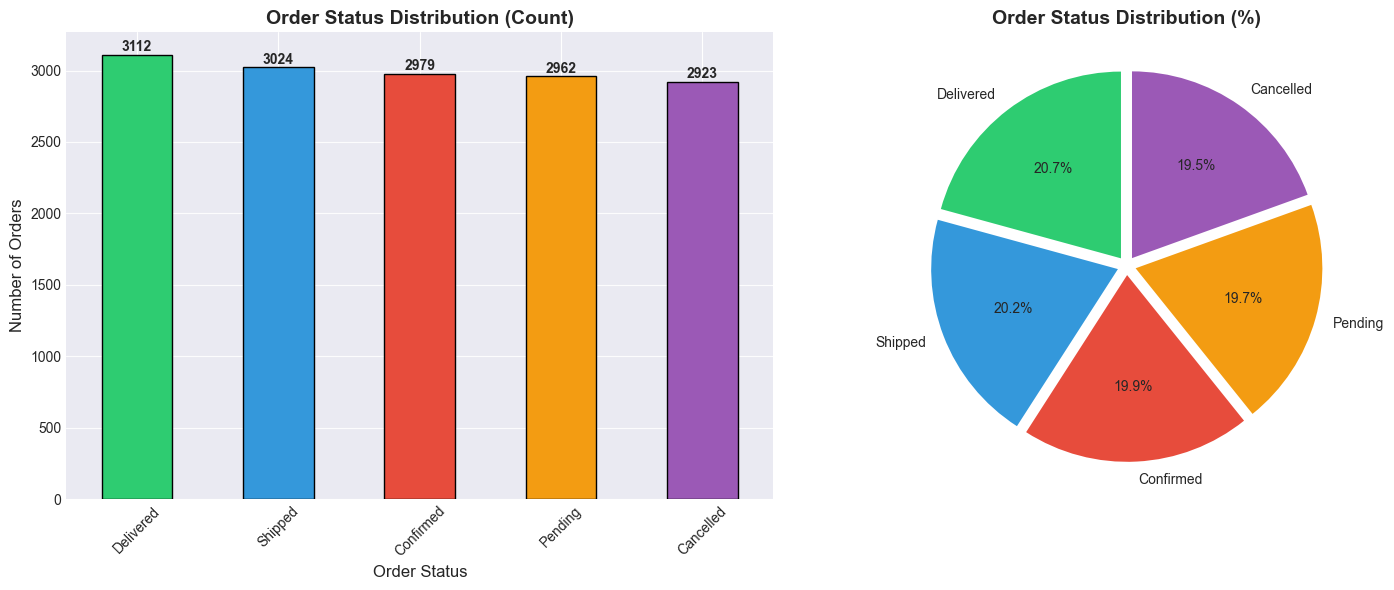

In [18]:
# Order status distribution
status_counts = orders_df['order_status'].value_counts()
print("Order Status Distribution:")
print(status_counts)
print(f"\nTotal Orders: {len(orders_df)}") # tabular

# Create bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12', '#9b59b6']
status_counts.plot(kind='bar', ax=ax1, color=colors, edgecolor='black')
ax1.set_title('Order Status Distribution (Count)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Order Status', fontsize=12)
ax1.set_ylabel('Number of Orders', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.9)

# Add value labels on bars
for i, v in enumerate(status_counts.values):
    ax1.text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
ax2.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, explode=[0.05]*len(status_counts))
ax2.set_title('Order Status Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Revenue Analysis by Order Status

Revenue by Order Status:
              Total Revenue  Average Order Value  Order Count
order_status                                                 
Cancelled       73287203.03         25072.597684         2923
Confirmed       75058264.40         25195.792011         2979
Delivered       77716158.75         24973.058724         3112
Pending         74654407.66         25204.053903         2962
Shipped         75698897.96         25032.704352         3024

Total Revenue: $376,414,931.80


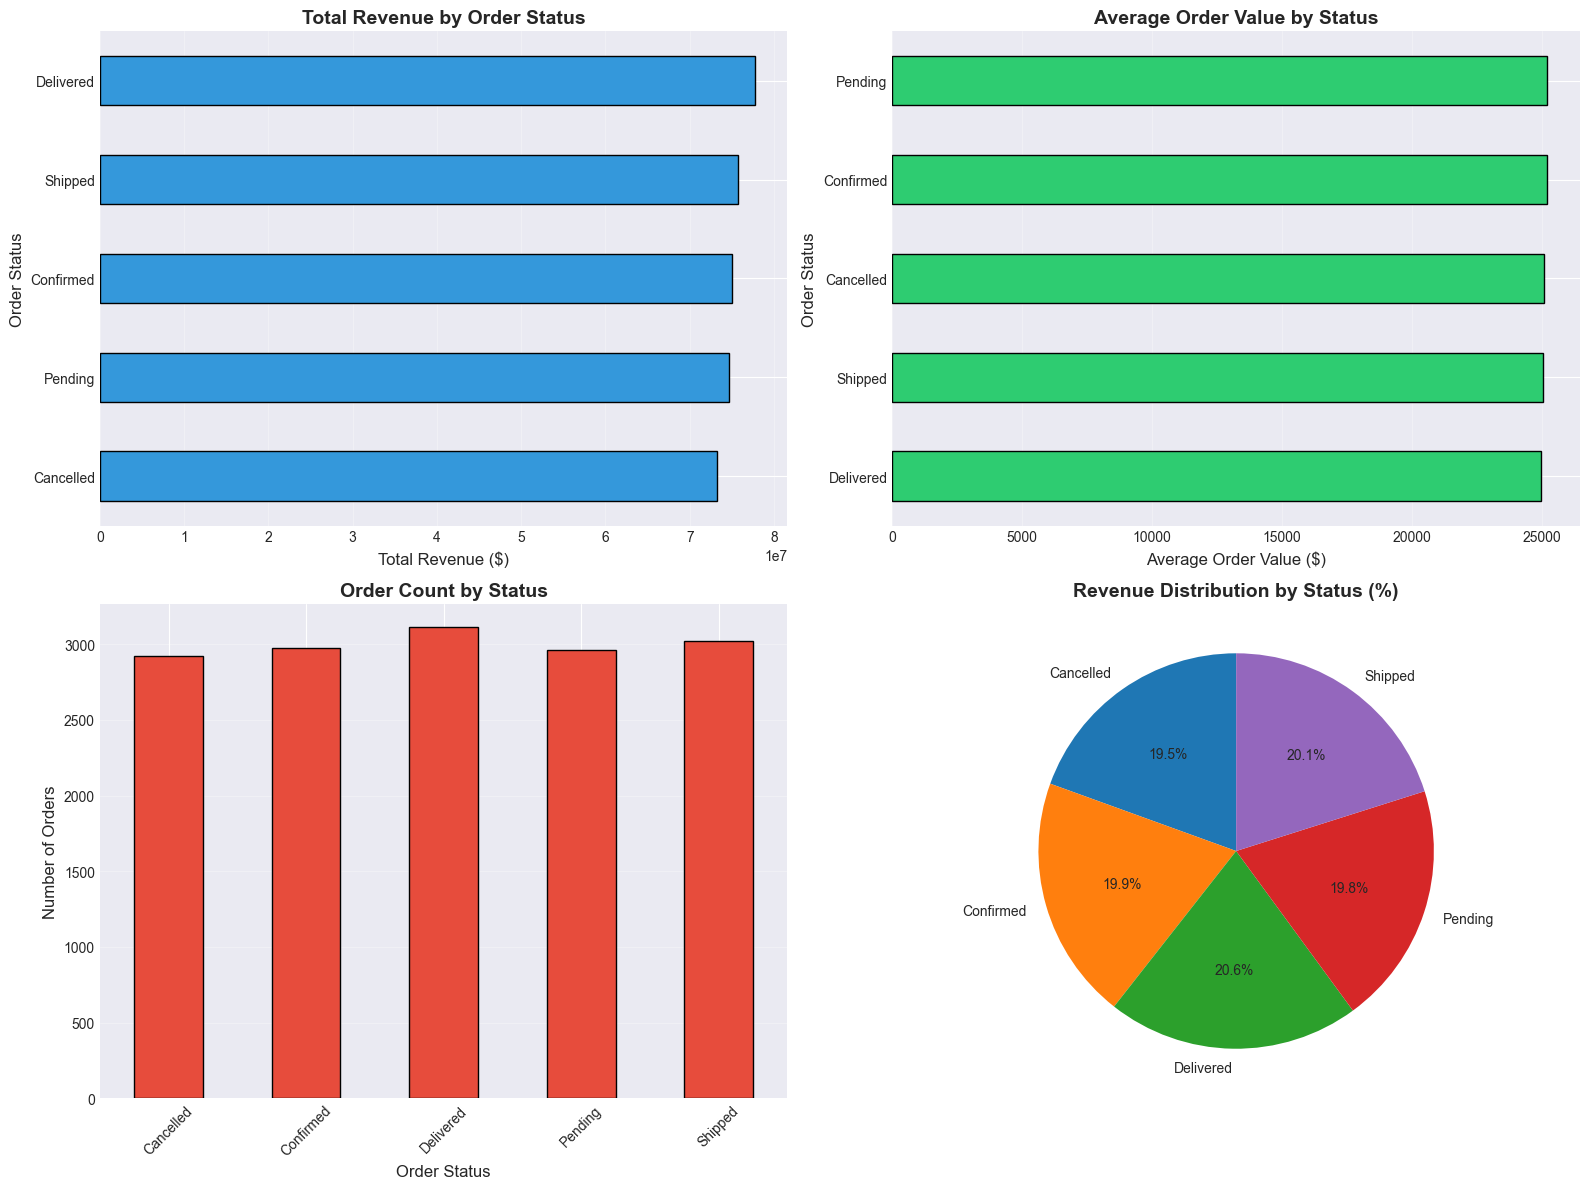

In [9]:
# Revenue by order status
revenue_by_status = orders_df.groupby('order_status')['total_amount'].agg(['sum', 'mean', 'count'])
revenue_by_status.columns = ['Total Revenue', 'Average Order Value', 'Order Count']
print("Revenue by Order Status:")
print(revenue_by_status)
print(f"\nTotal Revenue: ${revenue_by_status['Total Revenue'].sum():,.2f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Total revenue by status
revenue_by_status['Total Revenue'].sort_values(ascending=True).plot(
    kind='barh', ax=axes[0, 0], color='#3498db', edgecolor='black')
axes[0, 0].set_title('Total Revenue by Order Status', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Total Revenue ($)', fontsize=12)
axes[0, 0].set_ylabel('Order Status', fontsize=12)
axes[0, 0].grid(axis='x', alpha=0.3)

# Average order value by status
revenue_by_status['Average Order Value'].sort_values(ascending=True).plot(
    kind='barh', ax=axes[0, 1], color='#2ecc71', edgecolor='black')
axes[0, 1].set_title('Average Order Value by Status', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Average Order Value ($)', fontsize=12)
axes[0, 1].set_ylabel('Order Status', fontsize=12)
axes[0, 1].grid(axis='x', alpha=0.3)

# Order count by status
revenue_by_status['Order Count'].plot(
    kind='bar', ax=axes[1, 0], color='#e74c3c', edgecolor='black')
axes[1, 0].set_title('Order Count by Status', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Order Status', fontsize=12)
axes[1, 0].set_ylabel('Number of Orders', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Revenue distribution pie chart
axes[1, 1].pie(revenue_by_status['Total Revenue'], labels=revenue_by_status.index, 
               autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Revenue Distribution by Status (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Time Series Analysis - Orders and Revenue Over Time

In [20]:
# Extract month and year for time series analysis
orders_df['year_month'] = orders_df['order_date'].dt.to_period('M')
orders_df['year'] = orders_df['order_date'].dt.year
orders_df['month'] = orders_df['order_date'].dt.month

print(orders_df[['order_date', 'year_month', 'year', 'month']].head())

  order_date year_month  year  month
0 2025-03-03    2025-03  2025      3
1 2024-07-16    2024-07  2024      7
2 2024-11-27    2024-11  2024     11
3 2024-05-12    2024-05  2024      5
4 2024-04-20    2024-04  2024      4


Monthly Order Summary:
  year_month  order_count  total_revenue year_month_str
0    2024-02          374     9361805.02        2024-02
1    2024-03          649    16247599.59        2024-03
2    2024-04          643    16559122.70        2024-04
3    2024-05          656    16593804.48        2024-05
4    2024-06          579    14415929.42        2024-06
5    2024-07          629    15540169.12        2024-07
6    2024-08          658    16570940.22        2024-08
7    2024-09          589    14290402.11        2024-09
8    2024-10          601    15129802.75        2024-10
9    2024-11          632    15774018.25        2024-11


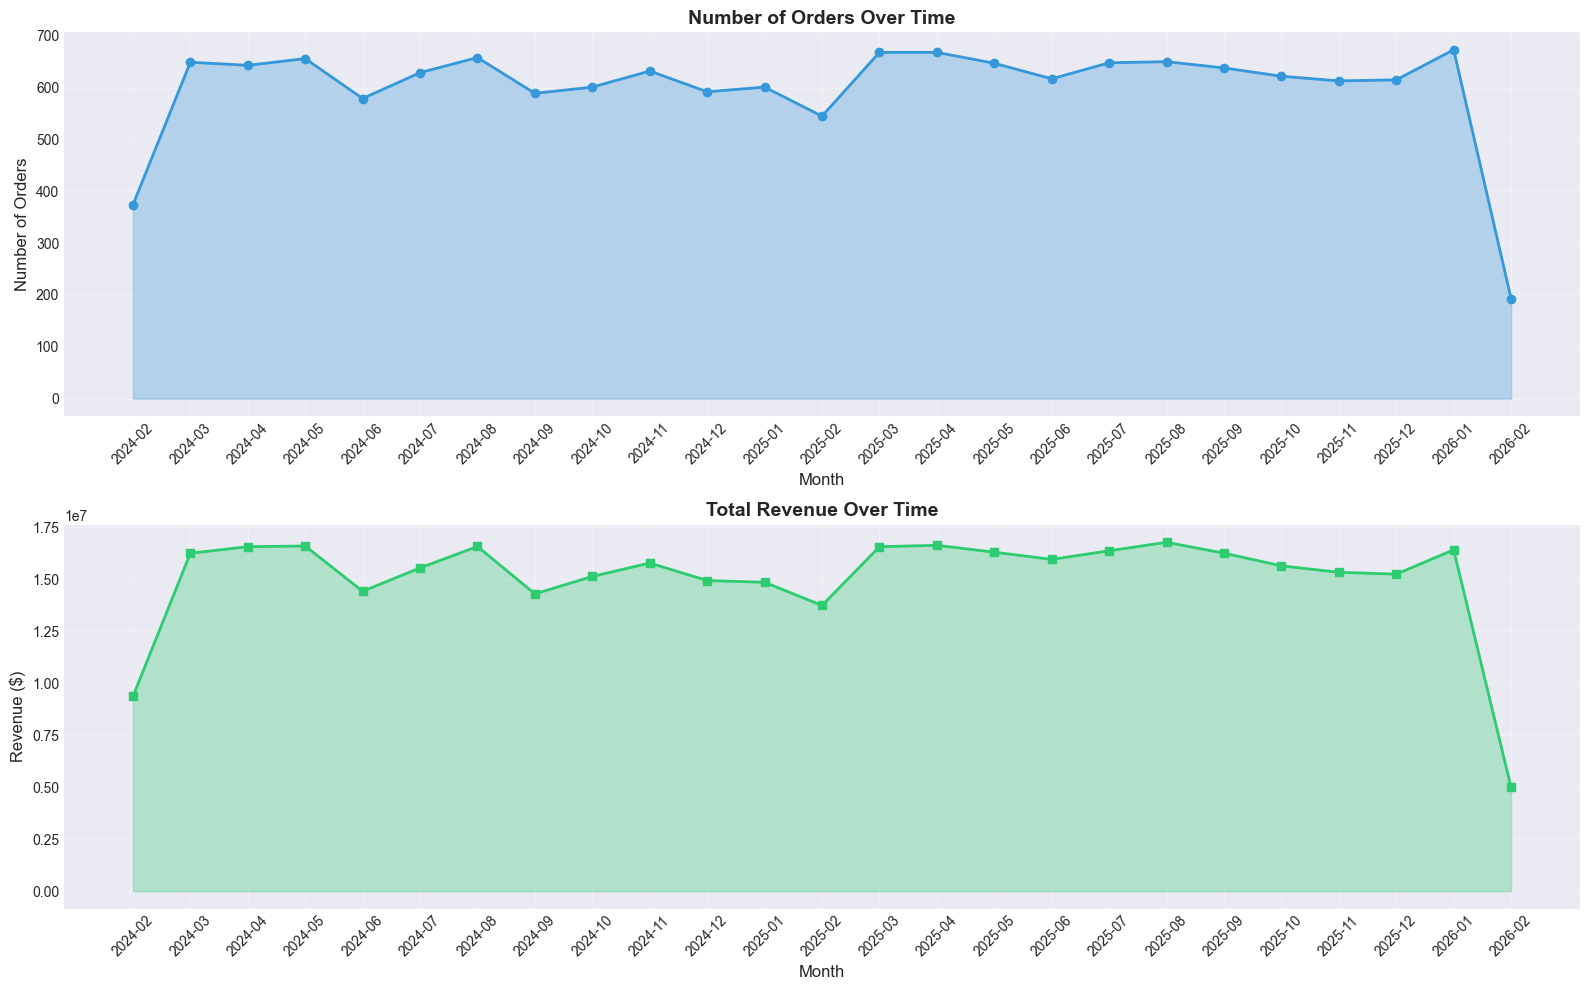

In [23]:

# Monthly aggregation
monthly_orders = orders_df.groupby('year_month').agg({
    'order_id': 'count',
    'total_amount': 'sum'
}).reset_index()
monthly_orders.columns = ['year_month', 'order_count', 'total_revenue']
monthly_orders['year_month_str'] = monthly_orders['year_month'].astype(str)

print("Monthly Order Summary:")
print(monthly_orders.head(10))

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Orders over time
axes[0].plot(monthly_orders['year_month_str'], monthly_orders['order_count'], 
             marker='o', linewidth=2, markersize=6, color='#3498db')
axes[0].fill_between(range(len(monthly_orders)), monthly_orders['order_count'], 
                      alpha=0.3, color='#3498db')
axes[0].set_title('Number of Orders Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Number of Orders', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Revenue over time
axes[1].plot(monthly_orders['year_month_str'], monthly_orders['total_revenue'], 
             marker='s', linewidth=2, markersize=6, color='#2ecc71')
axes[1].fill_between(range(len(monthly_orders)), monthly_orders['total_revenue'], 
                      alpha=0.3, color='#2ecc71')
axes[1].set_title('Total Revenue Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Revenue ($)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Order Amount Distribution Analysis

Order Amount Statistics:
count    15000.000000
mean     25094.328787
std      14217.870615
min        506.100000
25%      12811.327500
50%      25038.960000
75%      37447.092500
max      49999.890000
Name: total_amount, dtype: float64

Median Order Amount: $25,038.96


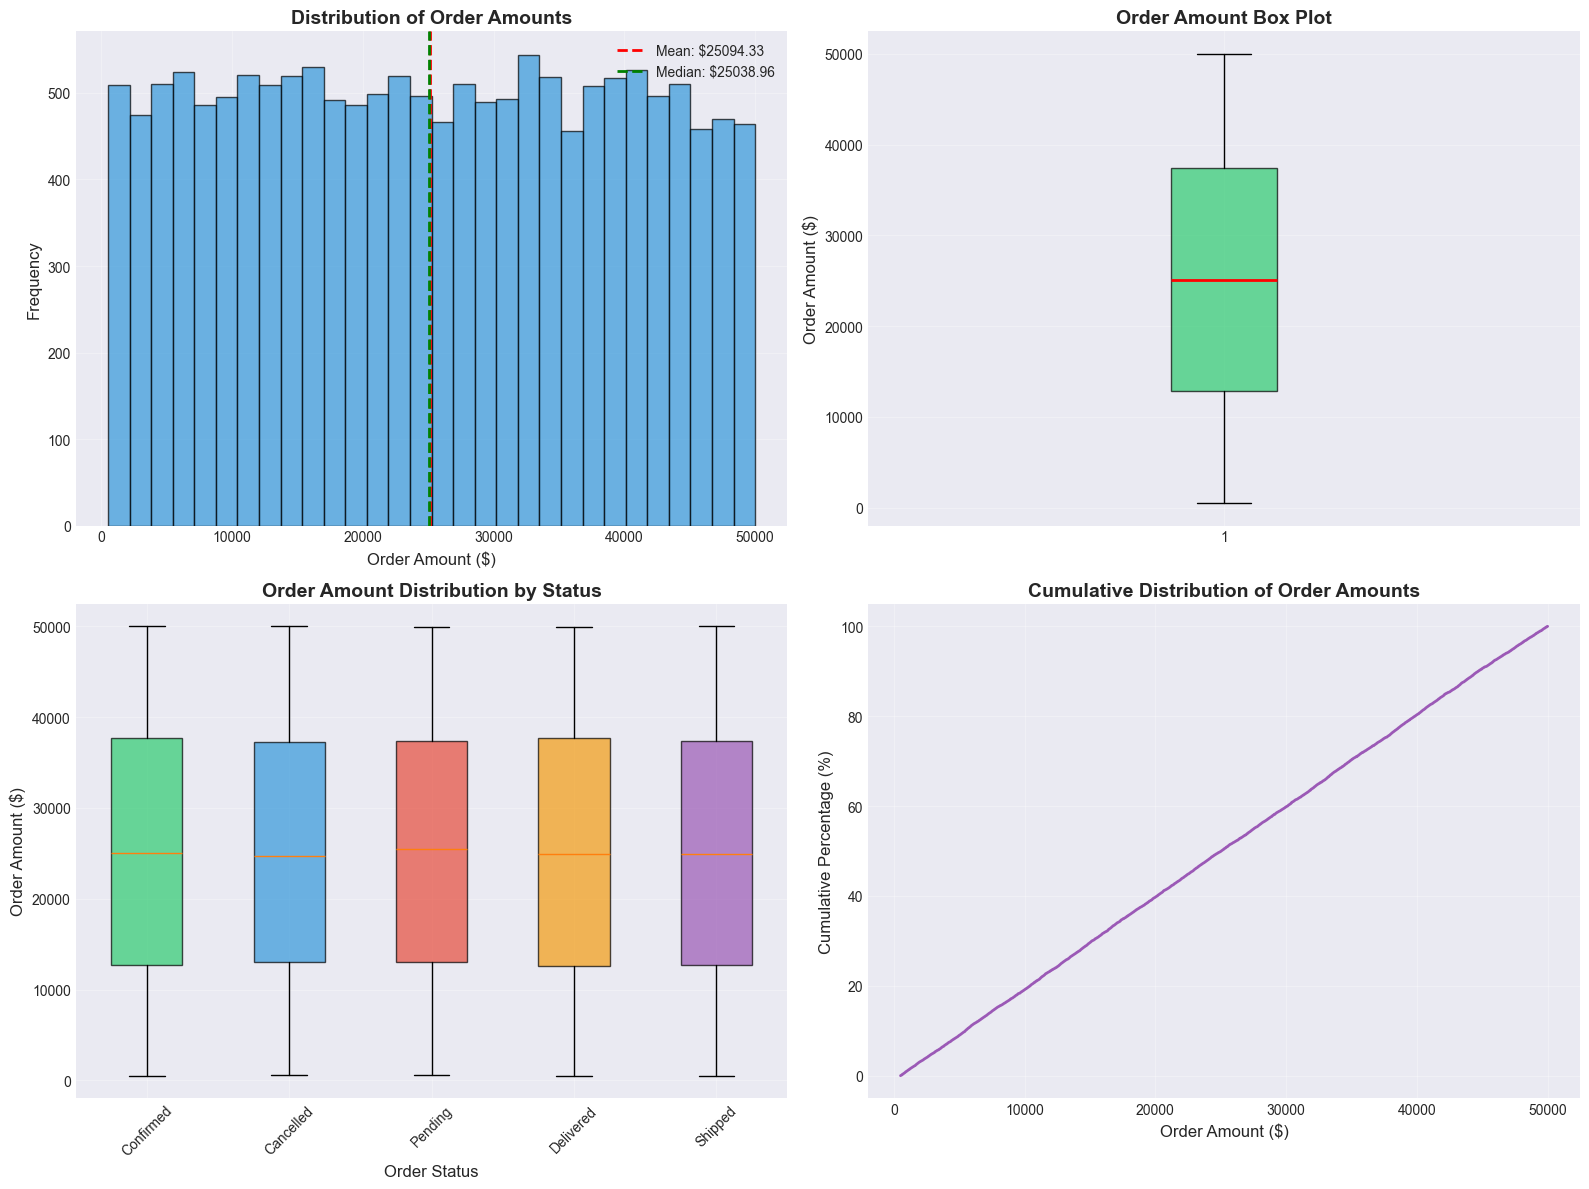

In [11]:
# Statistical summary of order amounts
print("Order Amount Statistics:")
print(orders_df['total_amount'].describe())
print(f"\nMedian Order Amount: ${orders_df['total_amount'].median():,.2f}")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram
axes[0, 0].hist(orders_df['total_amount'], bins=30, color='#3498db', 
                edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Order Amounts', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Order Amount ($)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].axvline(orders_df['total_amount'].mean(), color='red', 
                    linestyle='--', linewidth=2, label=f'Mean: ${orders_df["total_amount"].mean():.2f}')
axes[0, 0].axvline(orders_df['total_amount'].median(), color='green', 
                    linestyle='--', linewidth=2, label=f'Median: ${orders_df["total_amount"].median():.2f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Box plot
axes[0, 1].boxplot(orders_df['total_amount'], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='#2ecc71', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
axes[0, 1].set_title('Order Amount Box Plot', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Order Amount ($)', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# Box plot by status
status_data = [orders_df[orders_df['order_status'] == status]['total_amount'].values 
               for status in orders_df['order_status'].unique()]
bp = axes[1, 0].boxplot(status_data, labels=orders_df['order_status'].unique(),
                         patch_artist=True)
for patch, color in zip(bp['boxes'], ['#2ecc71', '#3498db', '#e74c3c', '#f39c12', '#9b59b6'][:len(bp['boxes'])]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1, 0].set_title('Order Amount Distribution by Status', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Order Status', fontsize=12)
axes[1, 0].set_ylabel('Order Amount ($)', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Cumulative distribution
sorted_amounts = np.sort(orders_df['total_amount'])
cumulative = np.arange(1, len(sorted_amounts) + 1) / len(sorted_amounts) * 100
axes[1, 1].plot(sorted_amounts, cumulative, linewidth=2, color='#9b59b6')
axes[1, 1].set_title('Cumulative Distribution of Order Amounts', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Order Amount ($)', fontsize=12)
axes[1, 1].set_ylabel('Cumulative Percentage (%)', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Top Customers Analysis

Top 10 Customers by Total Spending:
      customer_id  order_count  total_spent
4468         4724           10    315504.18
4068         4306            8    305129.32
3759         3970           10    290982.84
2726         2877           10    286929.99
2541         2682            9    285249.58
454           486            8    283413.97
1230         1292            7    276744.97
3314         3495            8    274456.36
2334         2465            7    274026.23
1676         1766            9    267946.62


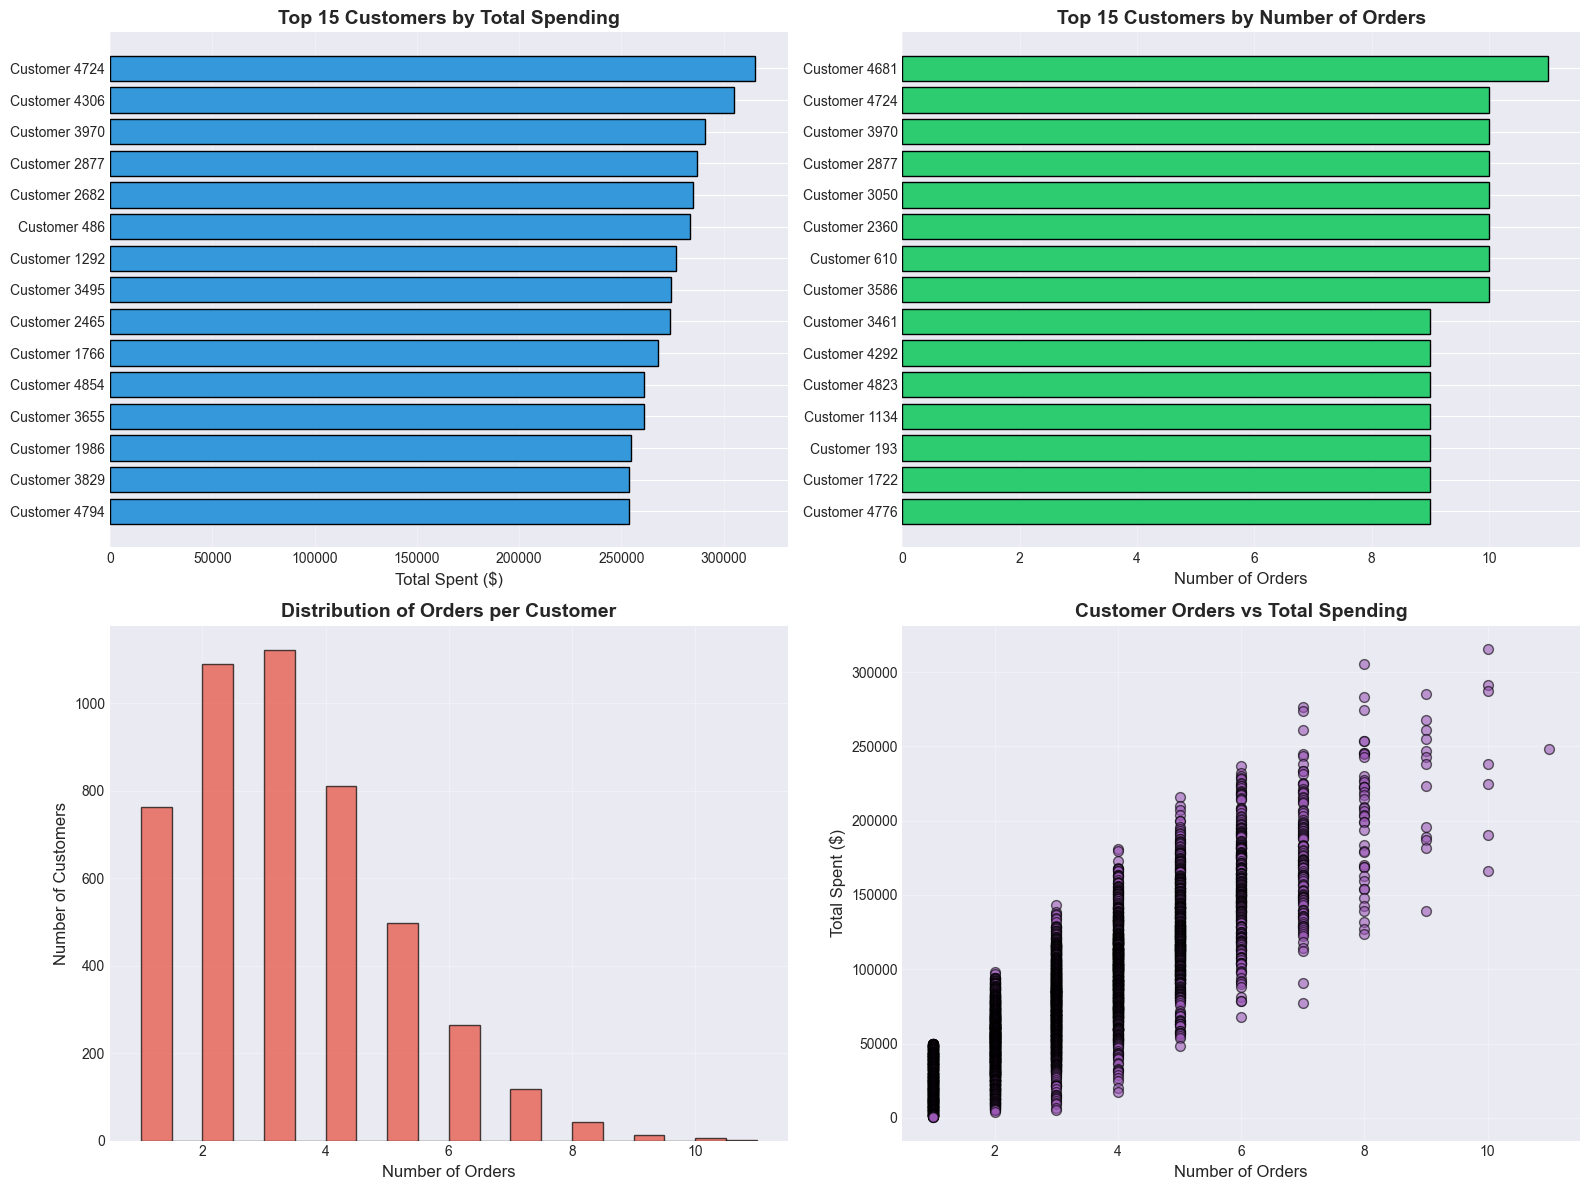

In [12]:
# Customer analysis
customer_stats = orders_df.groupby('customer_id').agg({
    'order_id': 'count',
    'total_amount': 'sum'
}).reset_index()
customer_stats.columns = ['customer_id', 'order_count', 'total_spent']
customer_stats = customer_stats.sort_values('total_spent', ascending=False)

print("Top 10 Customers by Total Spending:")
print(customer_stats.head(10))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 15 customers by revenue
top_customers = customer_stats.head(15)
axes[0, 0].barh(range(len(top_customers)), top_customers['total_spent'], 
                color='#3498db', edgecolor='black')
axes[0, 0].set_yticks(range(len(top_customers)))
axes[0, 0].set_yticklabels([f'Customer {c}' for c in top_customers['customer_id']])
axes[0, 0].set_title('Top 15 Customers by Total Spending', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Total Spent ($)', fontsize=12)
axes[0, 0].invert_yaxis()
axes[0, 0].grid(axis='x', alpha=0.3)

# Top 15 customers by order count
top_customers_orders = customer_stats.sort_values('order_count', ascending=False).head(15)
axes[0, 1].barh(range(len(top_customers_orders)), top_customers_orders['order_count'], 
                color='#2ecc71', edgecolor='black')
axes[0, 1].set_yticks(range(len(top_customers_orders)))
axes[0, 1].set_yticklabels([f'Customer {c}' for c in top_customers_orders['customer_id']])
axes[0, 1].set_title('Top 15 Customers by Number of Orders', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Number of Orders', fontsize=12)
axes[0, 1].invert_yaxis()
axes[0, 1].grid(axis='x', alpha=0.3)

# Distribution of orders per customer
axes[1, 0].hist(customer_stats['order_count'], bins=20, color='#e74c3c', 
                edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution of Orders per Customer', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Number of Orders', fontsize=12)
axes[1, 0].set_ylabel('Number of Customers', fontsize=12)
axes[1, 0].grid(True, alpha=0.3)

# Scatter plot: orders vs spending
axes[1, 1].scatter(customer_stats['order_count'], customer_stats['total_spent'], 
                   alpha=0.6, s=50, color='#9b59b6', edgecolors='black')
axes[1, 1].set_title('Customer Orders vs Total Spending', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Number of Orders', fontsize=12)
axes[1, 1].set_ylabel('Total Spent ($)', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Product Analysis - Most Popular Products

Top 10 Products by Revenue:
      product_id  total_quantity  total_revenue  order_count
2895        2896              47     8487561.27            6
209          210              45     7278008.40           10
1615        1616              91     5471859.12           16
1957        1958              76     4205754.12           11
2506        2507              72     3002379.84           16
2305        2306              51     2706891.81            9
4870        4871              47     2373903.73           10
3716        3717              36     2333235.60            6
478          479              45     2279785.05           10
3241        3242              59     2179814.00           11


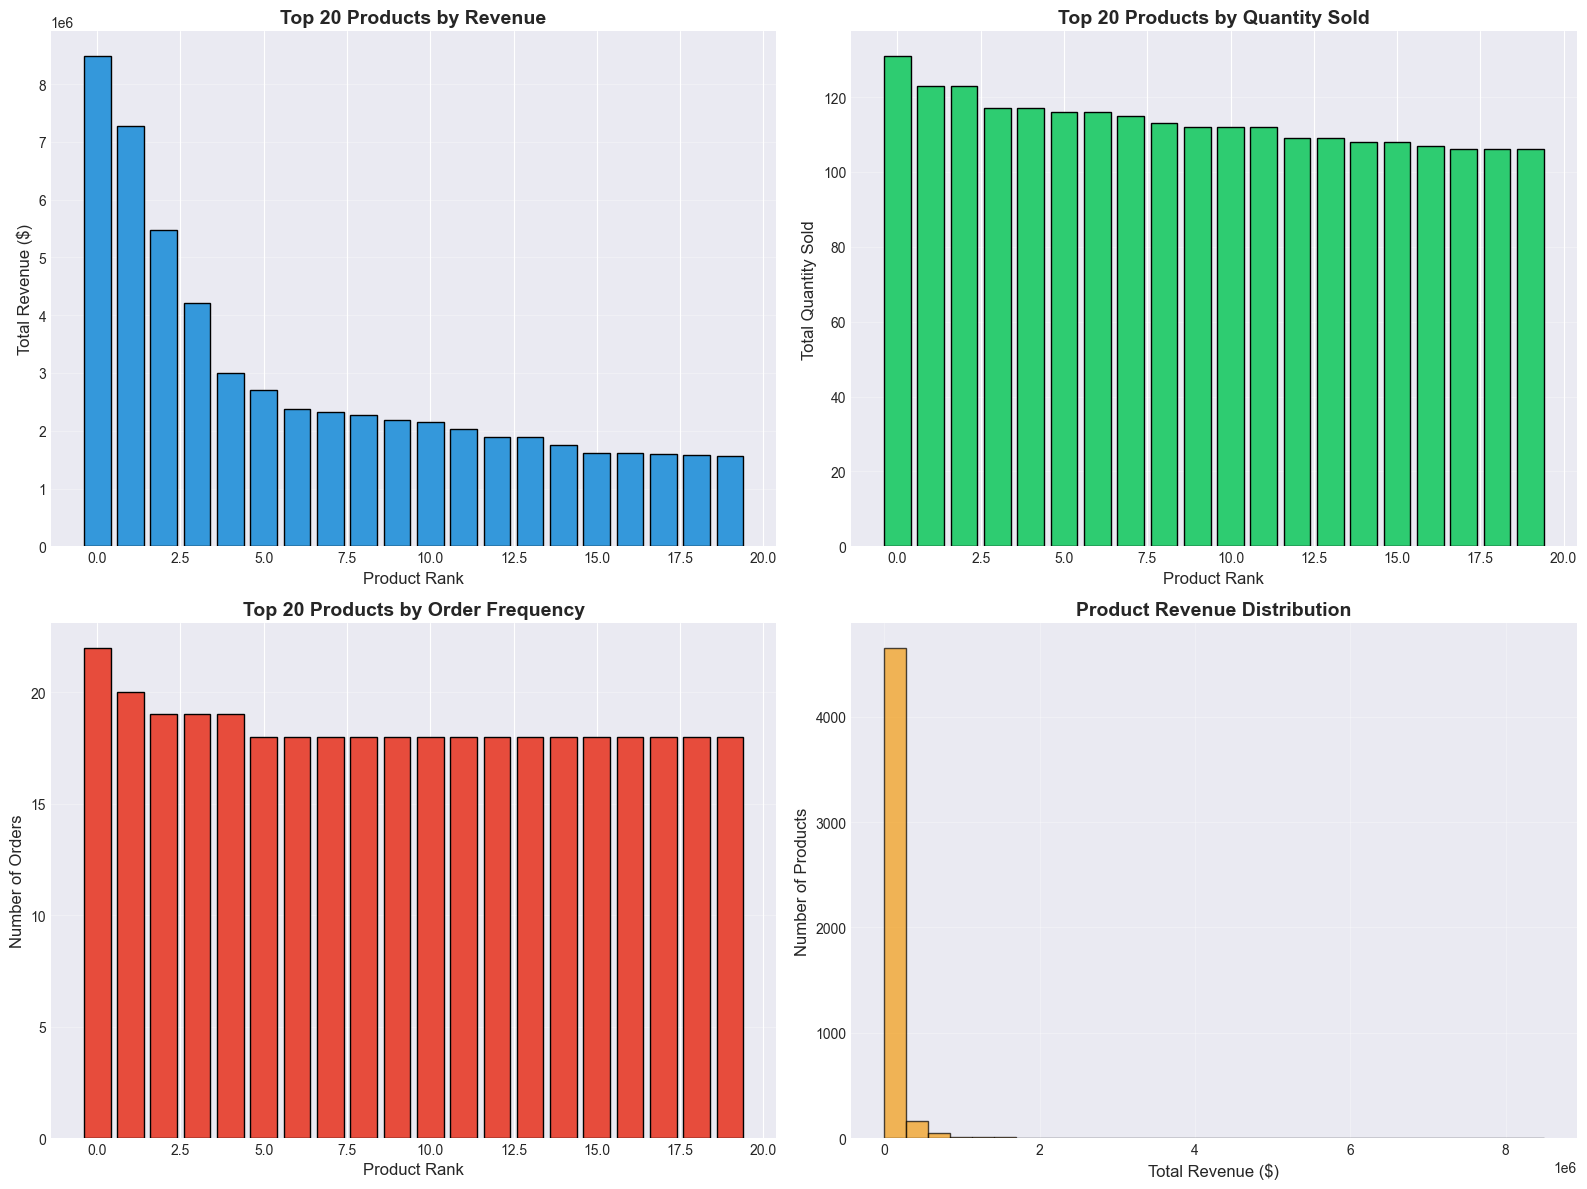

In [13]:
# Product analysis
product_stats = order_items_df.groupby('product_id').agg({
    'quantity': 'sum',
    'total_price': 'sum',
    'order_item_id': 'count'
}).reset_index()
product_stats.columns = ['product_id', 'total_quantity', 'total_revenue', 'order_count']
product_stats = product_stats.sort_values('total_revenue', ascending=False)

print("Top 10 Products by Revenue:")
print(product_stats.head(10))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 20 products by revenue
top_products = product_stats.head(20)
axes[0, 0].bar(range(len(top_products)), top_products['total_revenue'], 
               color='#3498db', edgecolor='black')
axes[0, 0].set_title('Top 20 Products by Revenue', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Product Rank', fontsize=12)
axes[0, 0].set_ylabel('Total Revenue ($)', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.3)

# Top 20 products by quantity sold
top_products_qty = product_stats.sort_values('total_quantity', ascending=False).head(20)
axes[0, 1].bar(range(len(top_products_qty)), top_products_qty['total_quantity'], 
               color='#2ecc71', edgecolor='black')
axes[0, 1].set_title('Top 20 Products by Quantity Sold', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Product Rank', fontsize=12)
axes[0, 1].set_ylabel('Total Quantity Sold', fontsize=12)
axes[0, 1].grid(axis='y', alpha=0.3)

# Top 20 products by order frequency
top_products_freq = product_stats.sort_values('order_count', ascending=False).head(20)
axes[1, 0].bar(range(len(top_products_freq)), top_products_freq['order_count'], 
               color='#e74c3c', edgecolor='black')
axes[1, 0].set_title('Top 20 Products by Order Frequency', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Product Rank', fontsize=12)
axes[1, 0].set_ylabel('Number of Orders', fontsize=12)
axes[1, 0].grid(axis='y', alpha=0.3)

# Product revenue distribution
axes[1, 1].hist(product_stats['total_revenue'], bins=30, color='#f39c12', 
                edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Product Revenue Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Total Revenue ($)', fontsize=12)
axes[1, 1].set_ylabel('Number of Products', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Order Items Analysis - Quantity and Pricing

Order Items Statistics:
           quantity     unit_price   total_price
count  44814.000000   44814.000000  4.481400e+04
mean       5.515486    1558.596834  8.682459e+03
std        2.877364    4770.420317  3.129650e+04
min        1.000000       3.870000  3.870000e+00
25%        3.000000     186.280000  7.671225e+02
50%        6.000000     519.685000  2.378990e+03
75%        8.000000    1371.682500  7.104625e+03
max       10.000000  180586.410000  1.805864e+06

Average items per order: 2.99


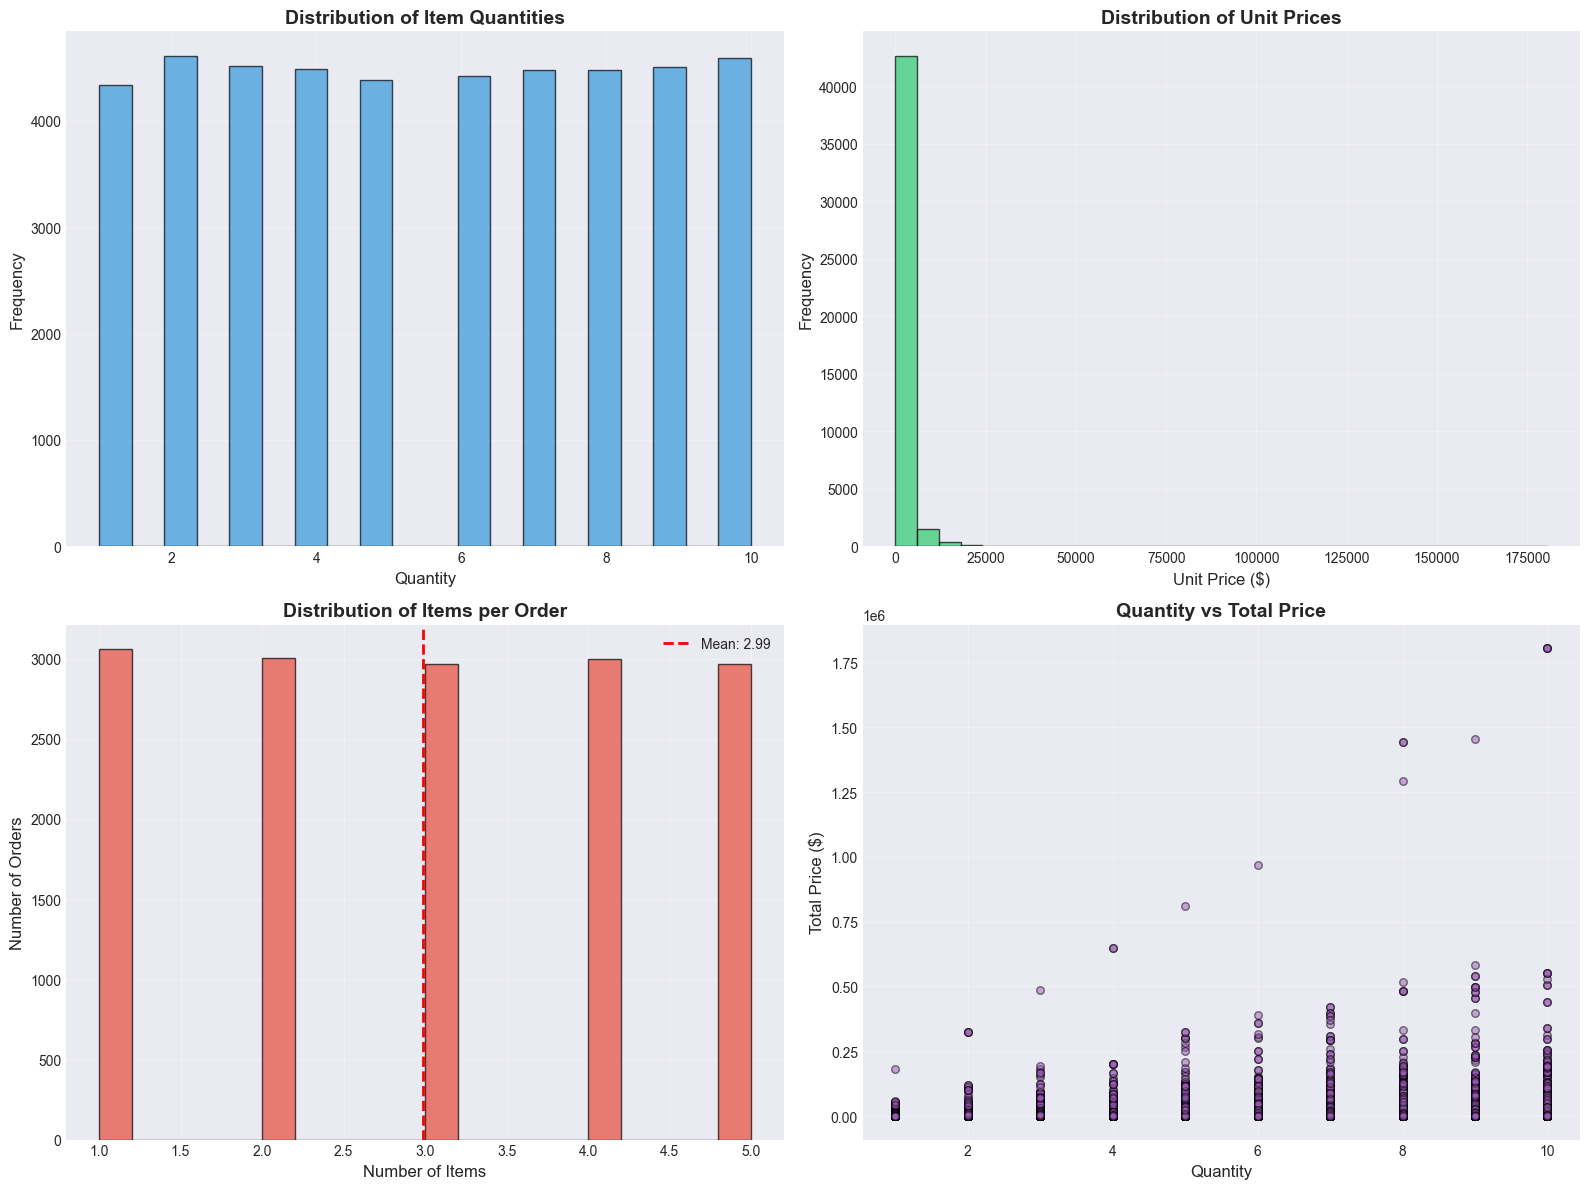

In [14]:
# Order items analysis
print("Order Items Statistics:")
print(order_items_df[['quantity', 'unit_price', 'total_price']].describe())

# Items per order
items_per_order = order_items_df.groupby('order_id').size().reset_index(name='item_count')
print(f"\nAverage items per order: {items_per_order['item_count'].mean():.2f}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Quantity distribution
axes[0, 0].hist(order_items_df['quantity'], bins=20, color='#3498db', 
                edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Item Quantities', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Quantity', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# Unit price distribution
axes[0, 1].hist(order_items_df['unit_price'], bins=30, color='#2ecc71', 
                edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution of Unit Prices', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Unit Price ($)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# Items per order distribution
axes[1, 0].hist(items_per_order['item_count'], bins=20, color='#e74c3c', 
                edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution of Items per Order', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Number of Items', fontsize=12)
axes[1, 0].set_ylabel('Number of Orders', fontsize=12)
axes[1, 0].axvline(items_per_order['item_count'].mean(), color='red', 
                    linestyle='--', linewidth=2, label=f'Mean: {items_per_order["item_count"].mean():.2f}')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Scatter plot: quantity vs total price
axes[1, 1].scatter(order_items_df['quantity'], order_items_df['total_price'], 
                   alpha=0.5, s=30, color='#9b59b6', edgecolors='black')
axes[1, 1].set_title('Quantity vs Total Price', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Quantity', fontsize=12)
axes[1, 1].set_ylabel('Total Price ($)', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 11. Seasonal Trends and Patterns

Yearly Statistics:
   year  order_count  total_revenue
0  2024         6602   1.654174e+08
1  2025         7532   1.896051e+08
2  2026          866   2.139243e+07

Quarterly Statistics:
   year  quarter  order_count  total_revenue year_quarter
0  2024        1         1023    25609404.61      2024-Q1
1  2024        2         1878    47568856.60      2024-Q2
2  2024        3         1876    46401511.45      2024-Q3
3  2024        4         1825    45837630.53      2024-Q4
4  2025        1         1814    45143489.99      2025-Q1
5  2025        2         1932    48872345.33      2025-Q2
6  2025        3         1936    49382379.27      2025-Q3
7  2025        4         1850    46206884.17      2025-Q4
8  2026        1          866    21392429.85      2026-Q1


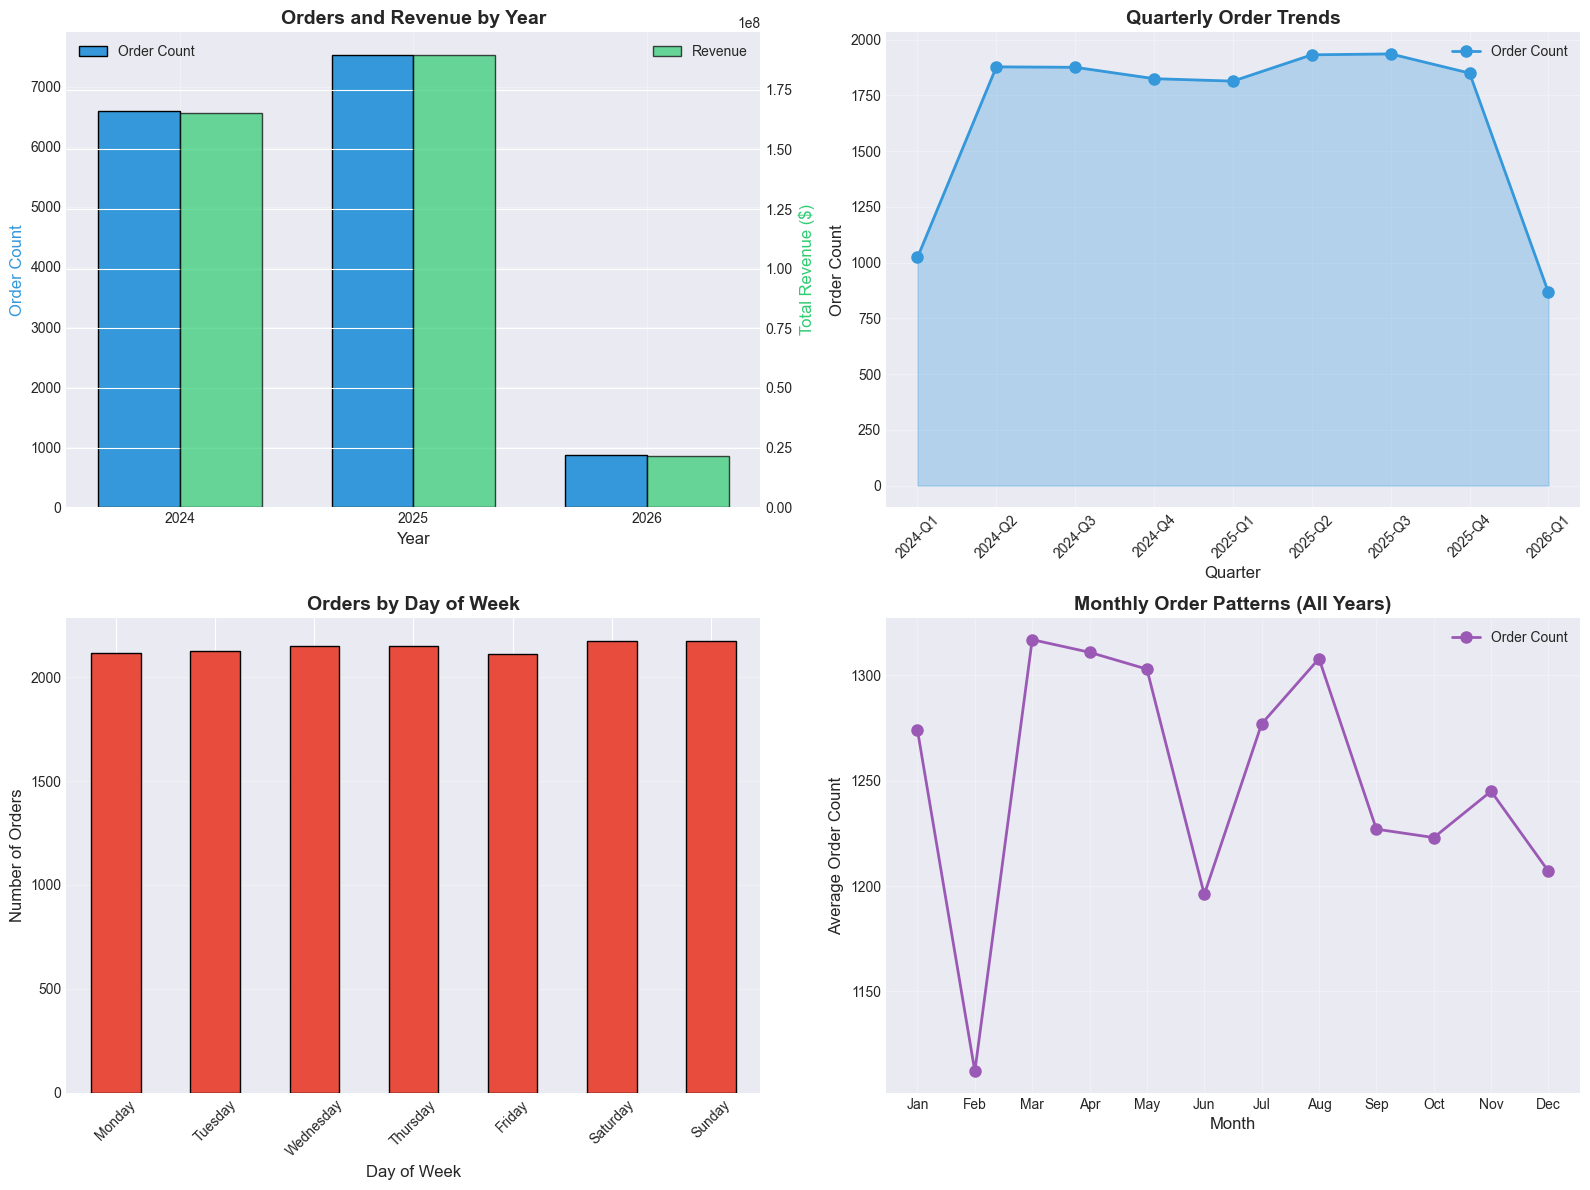

In [15]:
# Extract additional time features
orders_df['day_of_week'] = orders_df['order_date'].dt.day_name()
orders_df['quarter'] = orders_df['order_date'].dt.quarter

# Analysis by different time periods
yearly_stats = orders_df.groupby('year').agg({
    'order_id': 'count',
    'total_amount': 'sum'
}).reset_index()
yearly_stats.columns = ['year', 'order_count', 'total_revenue']

quarterly_stats = orders_df.groupby(['year', 'quarter']).agg({
    'order_id': 'count',
    'total_amount': 'sum'
}).reset_index()
quarterly_stats.columns = ['year', 'quarter', 'order_count', 'total_revenue']
quarterly_stats['year_quarter'] = quarterly_stats['year'].astype(str) + '-Q' + quarterly_stats['quarter'].astype(str)

print("Yearly Statistics:")
print(yearly_stats)
print("\nQuarterly Statistics:")
print(quarterly_stats)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Yearly comparison
x_pos = np.arange(len(yearly_stats))
width = 0.35
axes[0, 0].bar(x_pos - width/2, yearly_stats['order_count'], width, 
               label='Order Count', color='#3498db', edgecolor='black')
ax2 = axes[0, 0].twinx()
ax2.bar(x_pos + width/2, yearly_stats['total_revenue'], width, 
        label='Revenue', color='#2ecc71', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Year', fontsize=12)
axes[0, 0].set_ylabel('Order Count', fontsize=12, color='#3498db')
ax2.set_ylabel('Total Revenue ($)', fontsize=12, color='#2ecc71')
axes[0, 0].set_title('Orders and Revenue by Year', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(yearly_stats['year'])
axes[0, 0].legend(loc='upper left')
ax2.legend(loc='upper right')
axes[0, 0].grid(True, alpha=0.3)

# Quarterly trends
axes[0, 1].plot(quarterly_stats['year_quarter'], quarterly_stats['order_count'], 
                marker='o', linewidth=2, markersize=8, color='#3498db', label='Order Count')
axes[0, 1].fill_between(range(len(quarterly_stats)), quarterly_stats['order_count'], 
                         alpha=0.3, color='#3498db')
axes[0, 1].set_title('Quarterly Order Trends', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Quarter', fontsize=12)
axes[0, 1].set_ylabel('Order Count', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Orders by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_stats = orders_df.groupby('day_of_week')['order_id'].count().reindex(day_order)
dow_stats.plot(kind='bar', ax=axes[1, 0], color='#e74c3c', edgecolor='black')
axes[1, 0].set_title('Orders by Day of Week', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Day of Week', fontsize=12)
axes[1, 0].set_ylabel('Number of Orders', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Monthly patterns (aggregated across years)
monthly_pattern = orders_df.groupby('month').agg({
    'order_id': 'count',
    'total_amount': 'mean'
}).reset_index()
monthly_pattern.columns = ['month', 'order_count', 'avg_order_value']
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[1, 1].plot(monthly_pattern['month'], monthly_pattern['order_count'], 
                marker='o', linewidth=2, markersize=8, color='#9b59b6', label='Order Count')
axes[1, 1].set_title('Monthly Order Patterns (All Years)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Month', fontsize=12)
axes[1, 1].set_ylabel('Average Order Count', fontsize=12)
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].set_xticklabels(month_names)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Comprehensive Summary Dashboard

BUSINESS METRICS SUMMARY
Total Orders: 15,000
Total Revenue: $376,414,931.80
Average Order Value: $25,094.33
Total Customers: 4,731
Total Products Sold: 4,920
Average Orders per Customer: 3.17


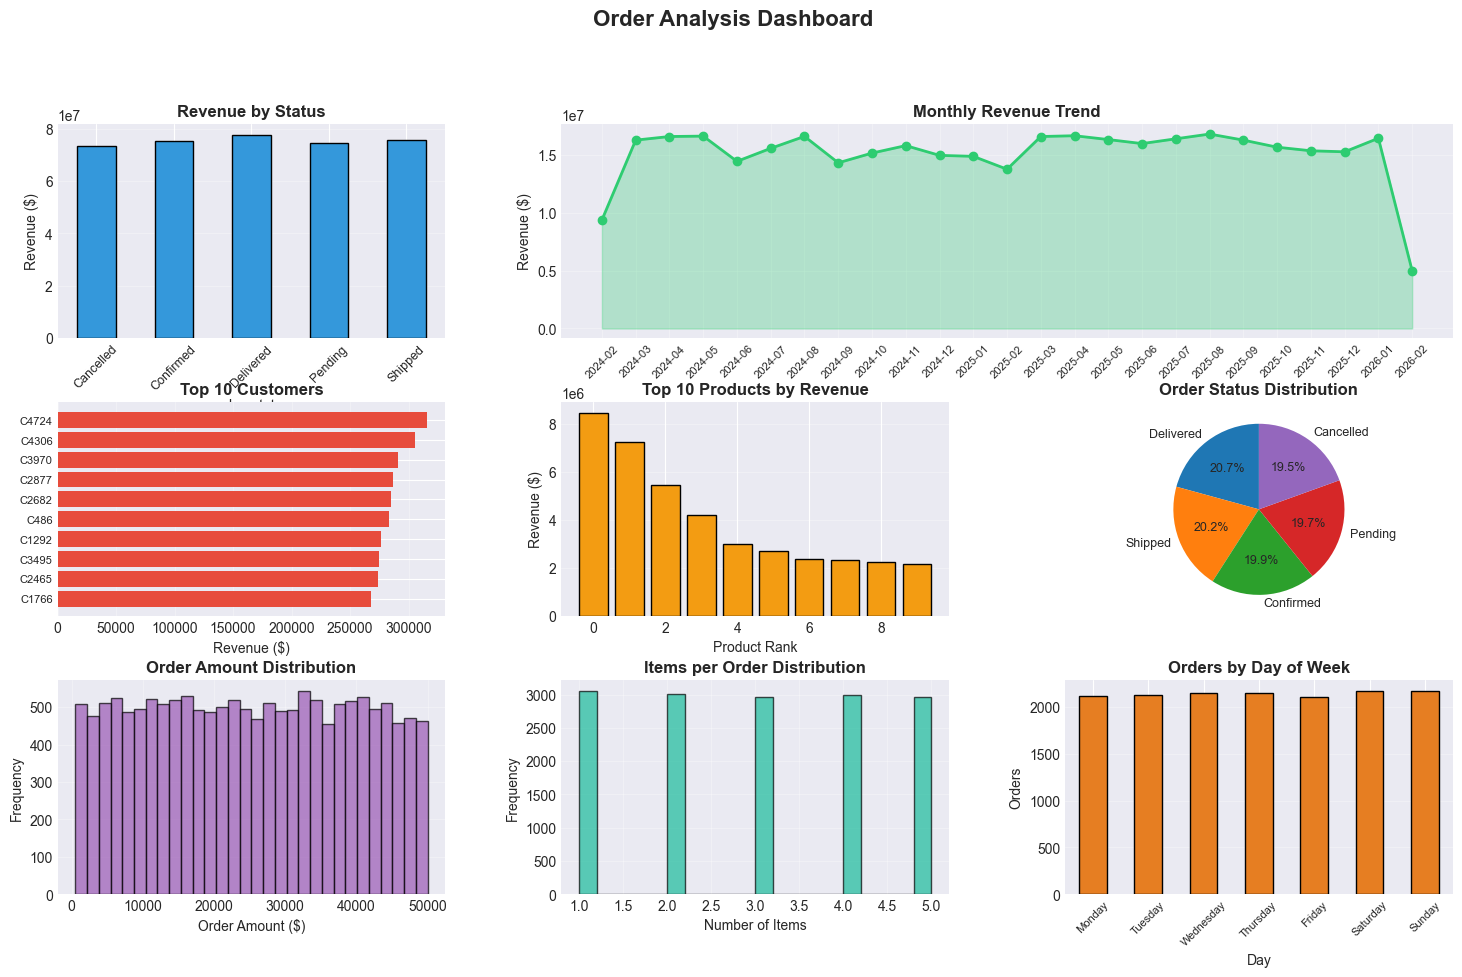

In [16]:
# Calculate key metrics
total_orders = len(orders_df)
total_revenue = orders_df['total_amount'].sum()
avg_order_value = orders_df['total_amount'].mean()
total_customers = orders_df['customer_id'].nunique()
total_products = order_items_df['product_id'].nunique()

print("=" * 80)
print("BUSINESS METRICS SUMMARY")
print("=" * 80)
print(f"Total Orders: {total_orders:,}")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Order Value: ${avg_order_value:,.2f}")
print(f"Total Customers: {total_customers:,}")
print(f"Total Products Sold: {total_products:,}")
print(f"Average Orders per Customer: {total_orders/total_customers:.2f}")
print("=" * 80)

# Create summary dashboard
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Revenue by status (top left)
ax1 = fig.add_subplot(gs[0, 0])
revenue_by_status['Total Revenue'].plot(kind='bar', ax=ax1, color='#3498db', edgecolor='black')
ax1.set_title('Revenue by Status', fontsize=12, fontweight='bold')
ax1.set_ylabel('Revenue ($)', fontsize=10)
ax1.tick_params(axis='x', rotation=45, labelsize=9)
ax1.grid(axis='y', alpha=0.3)

# Monthly revenue trend (top middle & right - spanning 2 columns)
ax2 = fig.add_subplot(gs[0, 1:])
ax2.plot(monthly_orders['year_month_str'], monthly_orders['total_revenue'], 
         marker='o', linewidth=2, color='#2ecc71')
ax2.fill_between(range(len(monthly_orders)), monthly_orders['total_revenue'], 
                  alpha=0.3, color='#2ecc71')
ax2.set_title('Monthly Revenue Trend', fontsize=12, fontweight='bold')
ax2.set_ylabel('Revenue ($)', fontsize=10)
ax2.tick_params(axis='x', rotation=45, labelsize=8)
ax2.grid(True, alpha=0.3)

# Top 10 customers (middle left)
ax3 = fig.add_subplot(gs[1, 0])
top_10_customers = customer_stats.head(10)
ax3.barh(range(len(top_10_customers)), top_10_customers['total_spent'], color='#e74c3c')
ax3.set_yticks(range(len(top_10_customers)))
ax3.set_yticklabels([f'C{c}' for c in top_10_customers['customer_id']], fontsize=8)
ax3.set_title('Top 10 Customers', fontsize=12, fontweight='bold')
ax3.set_xlabel('Revenue ($)', fontsize=10)
ax3.invert_yaxis()
ax3.grid(axis='x', alpha=0.3)

# Top 10 products (middle center)
ax4 = fig.add_subplot(gs[1, 1])
top_10_products = product_stats.head(10)
ax4.bar(range(len(top_10_products)), top_10_products['total_revenue'], color='#f39c12', edgecolor='black')
ax4.set_title('Top 10 Products by Revenue', fontsize=12, fontweight='bold')
ax4.set_xlabel('Product Rank', fontsize=10)
ax4.set_ylabel('Revenue ($)', fontsize=10)
ax4.grid(axis='y', alpha=0.3)

# Order status pie (middle right)
ax5 = fig.add_subplot(gs[1, 2])
ax5.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', 
        startangle=90, textprops={'fontsize': 9})
ax5.set_title('Order Status Distribution', fontsize=12, fontweight='bold')

# Order amount distribution (bottom left)
ax6 = fig.add_subplot(gs[2, 0])
ax6.hist(orders_df['total_amount'], bins=30, color='#9b59b6', edgecolor='black', alpha=0.7)
ax6.set_title('Order Amount Distribution', fontsize=12, fontweight='bold')
ax6.set_xlabel('Order Amount ($)', fontsize=10)
ax6.set_ylabel('Frequency', fontsize=10)
ax6.grid(True, alpha=0.3)

# Items per order (bottom center)
ax7 = fig.add_subplot(gs[2, 1])
ax7.hist(items_per_order['item_count'], bins=20, color='#1abc9c', edgecolor='black', alpha=0.7)
ax7.set_title('Items per Order Distribution', fontsize=12, fontweight='bold')
ax7.set_xlabel('Number of Items', fontsize=10)
ax7.set_ylabel('Frequency', fontsize=10)
ax7.grid(True, alpha=0.3)

# Day of week analysis (bottom right)
ax8 = fig.add_subplot(gs[2, 2])
dow_stats.plot(kind='bar', ax=ax8, color='#e67e22', edgecolor='black')
ax8.set_title('Orders by Day of Week', fontsize=12, fontweight='bold')
ax8.set_xlabel('Day', fontsize=10)
ax8.set_ylabel('Orders', fontsize=10)
ax8.tick_params(axis='x', rotation=45, labelsize=8)
ax8.grid(axis='y', alpha=0.3)

fig.suptitle('Order Analysis Dashboard', fontsize=16, fontweight='bold', y=0.995)
plt.show()

## 13. Key Insights and Conclusions

In [17]:
# Generate key insights
delivered_orders = orders_df[orders_df['order_status'] == 'Delivered']
cancelled_orders = orders_df[orders_df['order_status'] == 'Cancelled']

insights = f"""
KEY BUSINESS INSIGHTS
{'='*80}

1. OVERALL PERFORMANCE
   - Total Orders: {total_orders:,}
   - Total Revenue: ${total_revenue:,.2f}
   - Average Order Value: ${avg_order_value:,.2f}
   - Total Unique Customers: {total_customers:,}
   - Average Orders per Customer: {total_orders/total_customers:.2f}

2. ORDER STATUS INSIGHTS
   - Delivered Orders: {len(delivered_orders):,} ({len(delivered_orders)/total_orders*100:.1f}%)
   - Cancelled Orders: {len(cancelled_orders):,} ({len(cancelled_orders)/total_orders*100:.1f}%)
   - Cancellation Rate: {len(cancelled_orders)/total_orders*100:.1f}%

3. CUSTOMER INSIGHTS
   - Top Customer Spending: ${customer_stats['total_spent'].max():,.2f}
   - Average Customer Lifetime Value: ${customer_stats['total_spent'].mean():,.2f}
   - Most Orders by Single Customer: {customer_stats['order_count'].max()}

4. PRODUCT INSIGHTS
   - Total Unique Products: {total_products:,}
   - Top Product Revenue: ${product_stats['total_revenue'].max():,.2f}
   - Average Items per Order: {items_per_order['item_count'].mean():.2f}

5. REVENUE INSIGHTS
   - Highest Monthly Revenue: ${monthly_orders['total_revenue'].max():,.2f}
   - Lowest Monthly Revenue: ${monthly_orders['total_revenue'].min():,.2f}
   - Revenue from Delivered Orders: ${delivered_orders['total_amount'].sum():,.2f}
   - Potential Lost Revenue (Cancelled): ${cancelled_orders['total_amount'].sum():,.2f}

6. RECOMMENDATIONS
   - Focus on reducing cancellation rate to capture lost revenue
   - Implement customer retention programs for high-value customers
   - Optimize inventory for top-selling products
   - Analyze seasonal patterns for better demand forecasting
   - Investigate reasons for order cancellations
{'='*80}
"""

print(insights)


KEY BUSINESS INSIGHTS

1. OVERALL PERFORMANCE
   - Total Orders: 15,000
   - Total Revenue: $376,414,931.80
   - Average Order Value: $25,094.33
   - Total Unique Customers: 4,731
   - Average Orders per Customer: 3.17

2. ORDER STATUS INSIGHTS
   - Delivered Orders: 3,112 (20.7%)
   - Cancelled Orders: 2,923 (19.5%)
   - Cancellation Rate: 19.5%

3. CUSTOMER INSIGHTS
   - Top Customer Spending: $315,504.18
   - Average Customer Lifetime Value: $79,563.50
   - Most Orders by Single Customer: 11

4. PRODUCT INSIGHTS
   - Total Unique Products: 4,920
   - Top Product Revenue: $8,487,561.27
   - Average Items per Order: 2.99

5. REVENUE INSIGHTS
   - Highest Monthly Revenue: $16,771,665.54
   - Lowest Monthly Revenue: $4,983,796.20
   - Revenue from Delivered Orders: $77,716,158.75
   - Potential Lost Revenue (Cancelled): $73,287,203.03

6. RECOMMENDATIONS
   - Focus on reducing cancellation rate to capture lost revenue
   - Implement customer retention programs for high-value customers
